# Importando Bibliotecas

In [231]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

#### Dataset escolhido do kaggle, dataset esse que contém dados de pessoas que tiveram doenças cardíacas

In [232]:
df_h = pd.read_csv('heart.csv')
df_h['ExerciseAngina'] = df_h['ExerciseAngina'].map({'Y' : 1, 'N':0})
df_h['Sex'] = df_h['Sex'].map({'M' : 1, 'F':0})

#### Nesse dataset foi escolhido as colunas de Idade, Sexo, Batimentos em Descanso, Cloresterol, FastingBS, Maior Batimento Cardíaco, Se já teve Angina e Oldpeak

In [233]:
df_h.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


### Colunas Selecionadas

In [234]:
colunas_treino = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "ExerciseAngina", "Sex"]
matriz = np.array(df_h[colunas_treino])
vetor_y = np.array(df_h['HeartDisease'])

## Função para Printar Matriz de Confusão

In [235]:
def confusion_matrix_graphic(cf_matriz):
    #Construindo as Labels
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matriz.flatten()/ np.sum(cf_matriz)]
    labels = np.asarray([f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentages)]).reshape(2,2)
    #Ajustando o tamanho da figura
    plt.figure(figsize=(8,8))
    #Setando o Seaborn
    sns.set()
    #Fornecendo a confusion matrix para o seaborn
    ax = sns.heatmap(data= cf_matriz, cmap='Blues', annot=labels, fmt='')
    #Fornecendo os nomes dos eixos
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    return ax

## Função para executar a Rede

In [236]:
def executando_redeNeural(Xtreino, Ytreino, Xteste, Yteste, Alpha, randomState, layerSize, iteracoes, Activation, learningRate, Solver):
    #Chamando o código do Scikit para iniciar uma rede neural e com seus parametros
    modelo = MLPClassifier(solver= Solver, alpha=Alpha, random_state= randomState, hidden_layer_sizes= layerSize,max_iter = iteracoes, activation=Activation, learning_rate= learningRate)
    modelo.fit(X= Xtreino, y= Ytreino)
    #Prevendo os dados de outros dados
    previsto = modelo.predict(X=Xteste)
    #Calculando a acurácia
    acuracia = sklearn.metrics.accuracy_score(y_true = Yteste, y_pred= previsto)
    #Calculando matriz de confusão
    cf_matrix = sklearn.metrics.confusion_matrix(y_pred= previsto, y_true= Yteste)
    #Printando acurácia e matriz de confusão
    confusion_matrix_graphic(cf_matrix)
    print("Acuracia: {0:.2%}".format(acuracia))


### Padronizando as colunas usando Z-score e dividindo a base de dados

In [237]:
matriz_normalizada = stats.zscore(matriz)
Xtreino, Xteste, Ytreino,Yteste = train_test_split(matriz_normalizada, vetor_y, test_size = 0.25, random_state=4)

### Usando alpha 1e-1, camadas intermediárias de 70x35, 10000 iterações e learning rate constante, solver lbfgs

Acuracia: 77.39%


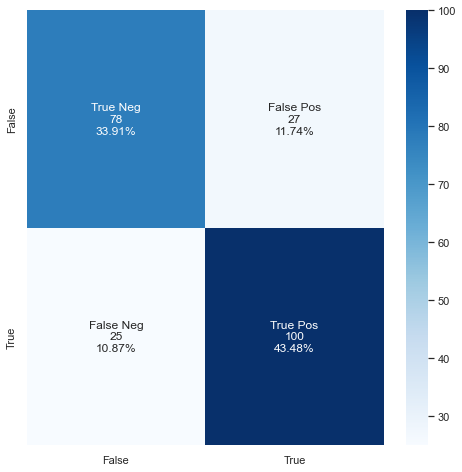

In [238]:
executando_redeNeural(Xtreino,Ytreino,Xteste,Yteste, 1e-1, 3 , (70,35), 10000, "relu", "constant", "lbfgs")

## Padronizando as colunas em min-max

In [239]:
matriz_minmax = normalize(matriz)
Xtreino, Xteste, Ytreino,Yteste = train_test_split(matriz_minmax, vetor_y, test_size = 0.25, random_state=4)

#### Aprendizado Constante, 50x35 sgd, relu

Acuracia: 63.04%


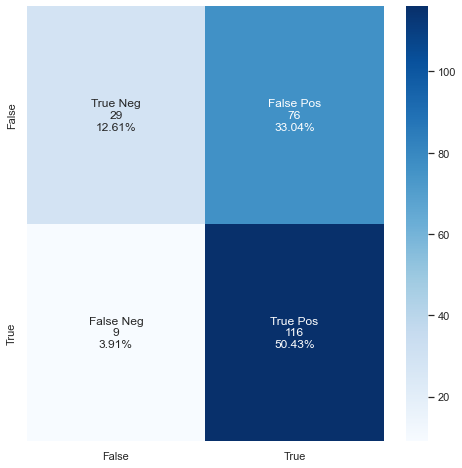

In [240]:
executando_redeNeural(Xtreino, Ytreino, Xteste, Yteste, 1e-1, 1, (50,35), 10000, 'relu', "constant", "sgd")

#### Aprendizado Constante, 50x35 sgd, logistic

Acuracia: 54.35%


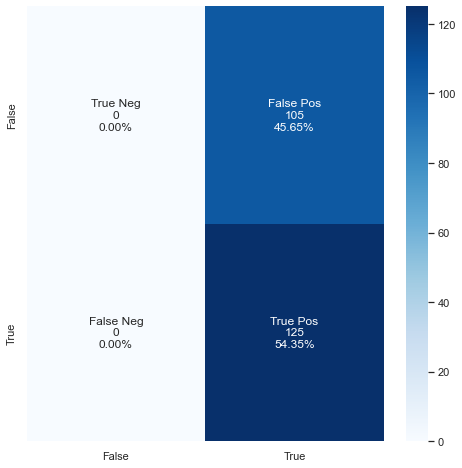

In [241]:
executando_redeNeural(Xtreino, Ytreino, Xteste, Yteste, 1e-1, 1, (50,35), 10000, 'logistic', "constant", "sgd")

### Aprendizado descrescente, lbfgs, relu, 50x35

Acuracia: 85.22%


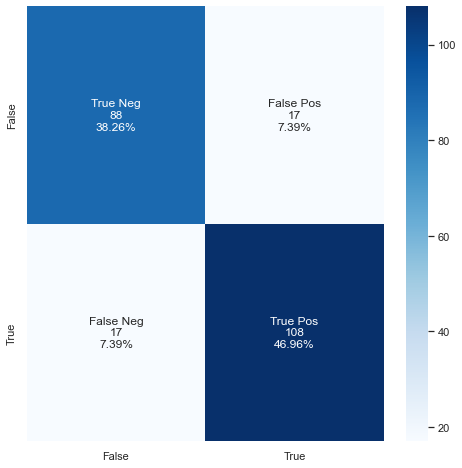

In [242]:
executando_redeNeural(Xtreino, Ytreino, Xteste, Yteste, 1e-1, 1, (50,35), 10000, 'relu', "invscaling", "lbfgs")

### Trocando a porcentagem de divisão de treino e teste para 28% teste

In [243]:
matriz_minmax = normalize(matriz)
Xtreino, Xteste, Ytreino,Yteste = train_test_split(matriz_minmax, vetor_y, test_size = 0.28, random_state=4)

### Aprendizado descrescente, lbfgs, relu, 50x35

Acuracia: 86.82%


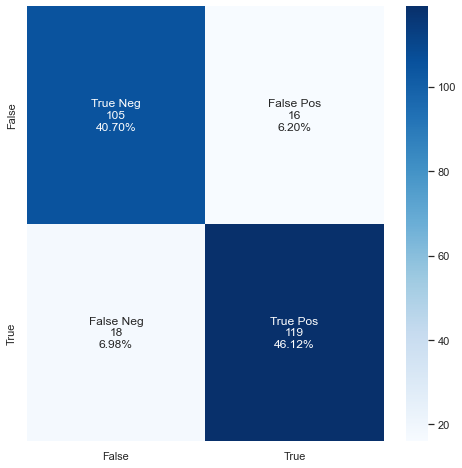

In [244]:
executando_redeNeural(Xtreino, Ytreino, Xteste, Yteste, 1e-1, 1, (50,35), 10000, 'relu', 'invscaling', 'lbfgs')

## Regressão logística

Acuracia: 71.32%


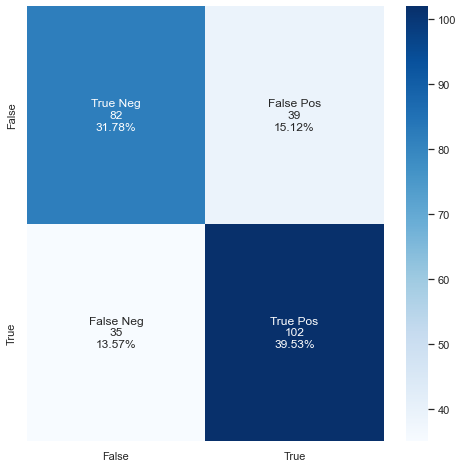

In [245]:
logisticReg = LogisticRegression()
logisticReg.fit(X=Xtreino, y = Ytreino)
previsto = logisticReg.predict(Xteste)
acuracia = logisticReg.score(X=Xteste, y=Yteste)
cf_matriz = confusion_matrix_graphic(sklearn.metrics.confusion_matrix(y_true= Yteste, y_pred= previsto))
print("Acuracia: {0:.2%}".format(acuracia))

### Portanto, com base no estudo apresentado, é possível concluir que as redes neurais possuem uma precisão significativamente superior no caso apresentado. Tendo a Rede Neural em seu melhor estado atingindo 86.8% e a Regressão Logística 71.32%